# Simple Moving Average and MACD using Pandas

## Overview

This notebook shows how to easily compute financial indicators like SMA and MACD using Pandas. Here is what it does:

1. Downoad a set of prices from Yahoo Finance (using the yfinance library), and display the chart. yfinance returns all data as a Pandas Dataframe, which makes it suitable for this.
2. Calculate the 50 and 200 day simple moving average and display the chart again.
3. Compute the MACD indicator and display the chart a final time.

## Installation instructions   

1. Create virutal environment
    
    `>> python3 -m venv venv`
    
   
2. Intall requirements and run notebook
    ```sh
    >> source ./venv/bin/activate
    (venv) >> pip install -r requirements.txt
    (venv) >> jupyter notebook
    ```

<AxesSubplot:xlabel='Date'>

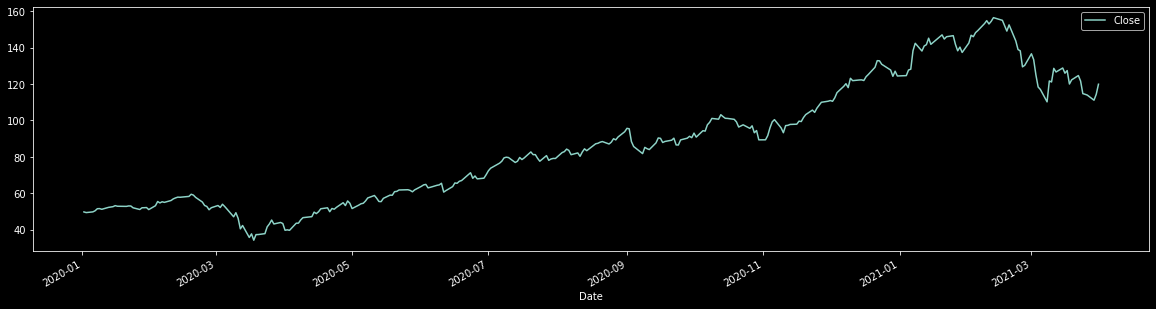

In [1]:
#
# Step 1. read the price data and plot the chart
#

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('dark_background')

ticker = yf.Ticker('ARKK')

hist = ticker.history(start='2020-01-01', end='2021-04-1')

hist = hist[['Close']]

hist.plot(figsize=(20,5))

<AxesSubplot:xlabel='Date'>

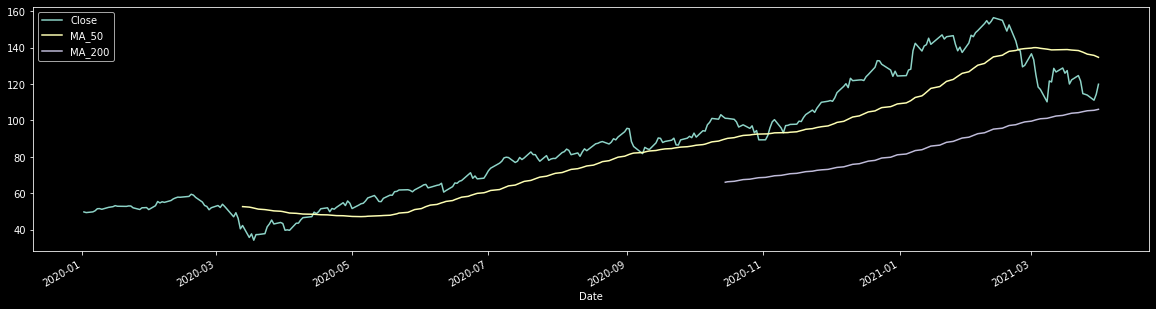

In [2]:
#
# Generate the moving average and plot again
#

hist['MA_50'] = hist['Close'].rolling(window=50).mean()
hist['MA_200'] = hist['Close'].rolling(window=200).mean()
    
hist.plot(figsize=(20,5))

<AxesSubplot:xlabel='Date'>

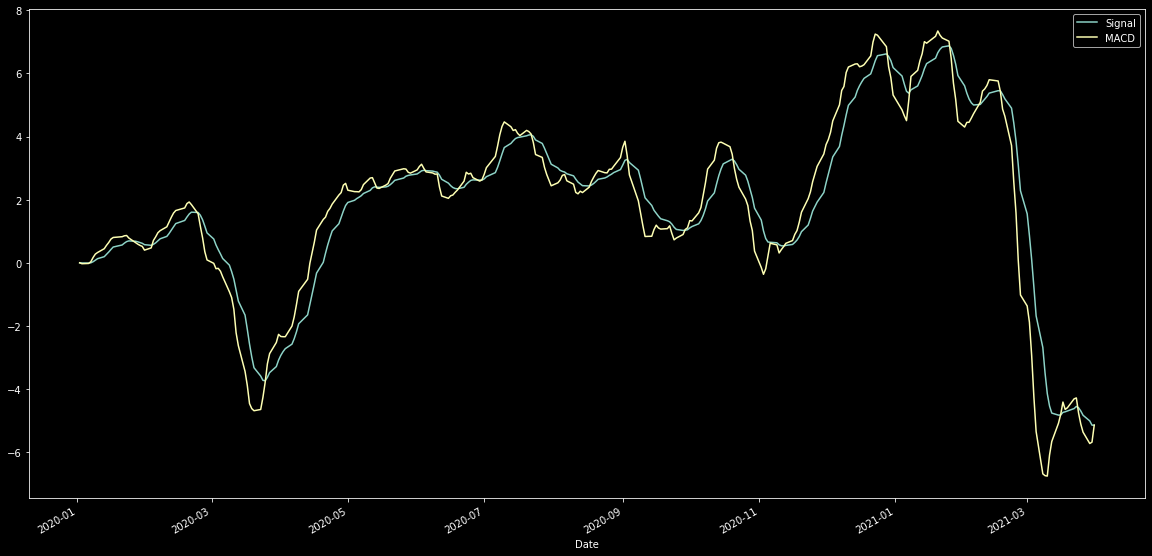

In [73]:
#
# Generate MACD and plot again
#


slow_period = hist['Close'].ewm(span=26, adjust=False).mean()
fast_period = hist['Close'].ewm(span=12, adjust=False).mean()

macd = fast_period - slow_period

signal = macd.ewm(span=9, adjust=False).mean()

macd_dataframe = pd.DataFrame({'Signal': signal, 'MACD': macd})
macd_dataframe.plot(figsize=(20,10))